# Exercise 5.7:
Consider the integral

$$I = \int_0^1 \sin^2\sqrt{100x}\text{d}x$$

a) Write a program that uses the adpative trapezoidal rule method of Section 5.3 and Eq. (5.34) to calculate the value of this integral to an approximate accuracy of $\epsilon=10^{-6}$ (i.e. correct to six digits after the decimal point). Start with one single integration slice andwork up from there to two, four , eight, and so forth. Have y0ur program to print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slice $N$, until the target accuracy is reached. (Hint: You shuold find the result is around $I=0.45$.)

Eq. 5.34

$$ I_i = \frac{1}{2}I_{i-1} + h_i \sum_{k\text{ } odd} f(a+kh_i)$$

Error for the trapezoidal rule

$$ \epsilon_i = \frac{1}{3}(I_i -I_{i-1}) $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(np.sqrt(100*x))**2

In [3]:
def trapezoid_adaptive(f, start, end, N, I_prev=0):
    '''
    Calculates the integral with  the trapezoidal rule for a function f from start to end with N slices
    parameters: 
    f - function to be integrated
    start - float the starting point for the integral
    end - float the end point for the integral
    N - int the number of slices to be used
    '''
    
    
    h = (end-start)/N
    x = np.linspace(start, end, N+1)
    if N == 1:
        return h*(f(start)/2 + f(end)/2), 1
    
    # we're only interested in odd entries
    weights = np.ones(N+1)
    weights[::2] = 0
    weights[-1] = 0 
    
    odd_values = f(x[1::2])
    
    I = I_prev/2 + h*sum(odd_values)
    error = (I-I_prev)/3
    
    return I, abs(error)

 with 2 slices we have an error of 0.05908414108660753
 with 4 slices we have an error of 0.06235031430561896
 with 8 slices we have an error of 0.03642846741502772
 with 16 slices we have an error of 0.009035306938832885
 with 32 slices we have an error of 0.0061037654975743165
 with 64 slices we have an error of 0.0018327551426352933
 with 128 slices we have an error of 0.000478524385808754
 with 256 slices we have an error of 0.00012092069347964991
 with 512 slices we have an error of 3.0311066141042176e-05
 with 1024 slices we have an error of 7.582826918613635e-06
 with 2048 slices we have an error of 1.8960230755427077e-06
 with 4096 slices we have an error of 4.74025541467397e-07


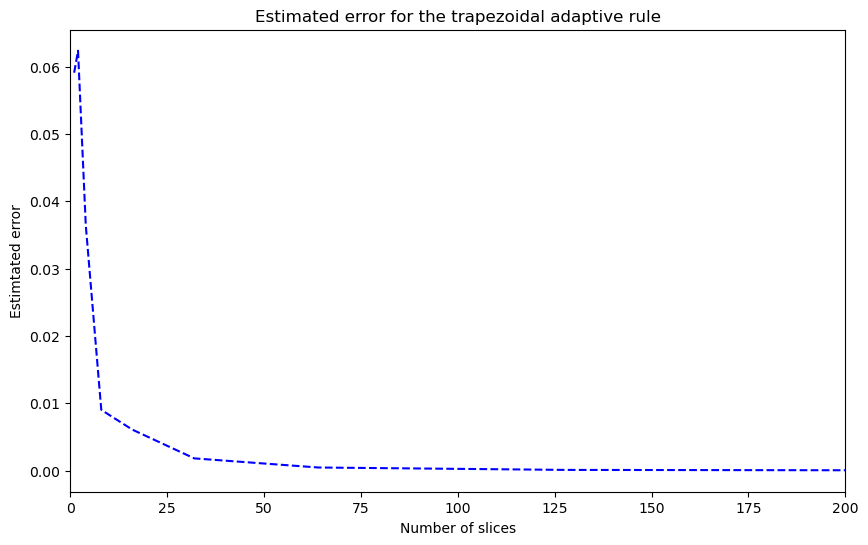

An accuracy of 1e-6 is reached at the number of slices N = 4096


In [4]:
start, end = 0, 1
N = 1
epsilon = 1e-6 # our desired accuracy

Integrands, errors = [], []
I_prev, error = trapezoid_adaptive(f, start, end, N)
Integrands.append(I_prev)

while abs(error) > epsilon:
    N *= 2
    I_prev, error = trapezoid_adaptive(f, start, end, N, I_prev = I_prev)
    print(f" with {N} slices we have an error of {error}")
    Integrands.append(I_prev)
    errors.append(error)

Ns = [2**i for i in range(len(errors))]

plt.figure(figsize=(10,6))
plt.title("Estimated error for the trapezoidal adaptive rule")
plt.ylabel("Estimtated error")
plt.xlabel("Number of slices")
plt.plot(Ns, errors,'b--')
#plt.plot(Ns, hz,'k')
plt.xlim(0,200)
plt.show()

print(f"An accuracy of 1e-6 is reached at the number of slices N = {N}")

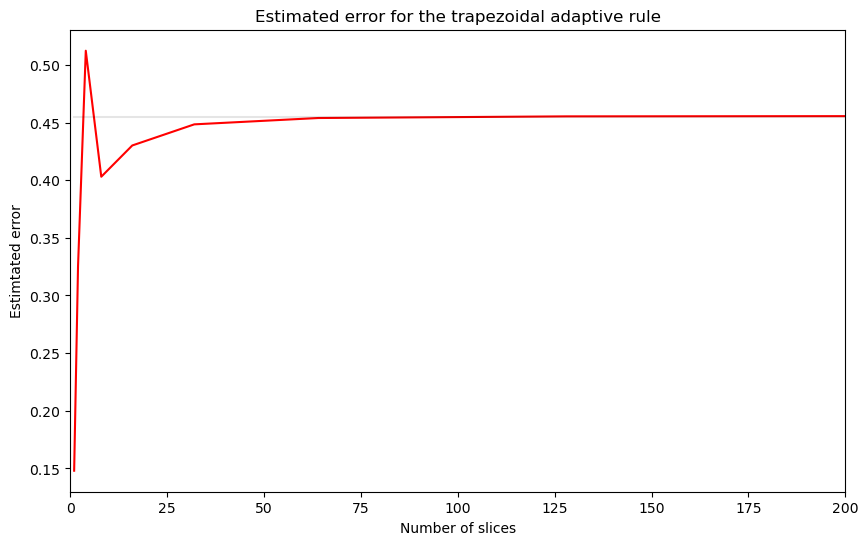

In [5]:
 
plt.figure(figsize=(10,6))
plt.title("Estimated error for the trapezoidal adaptive rule")
plt.ylabel("Estimtated error")
plt.xlabel("Number of slices")
plt.plot(Ns, Integrands[:-1],'r')
plt.plot(Ns, [0.455 for _ in range(len(Ns))], 'k', alpha=0.1)
#plt.plot(Ns, hz,'k')
plt.xlim(0,200)
plt.show()

b) Now modify your program to evaluate the same integral using the Romberg integration technique described in this section. Have your program pint out a traingular table of values, as on page 161, of all the Romberg estimates of the integral. Calculate the error on your estimates using Eq. 5.49 and again continue the calculation until you reach an accuracy of $\epsilon = 10^{-6}$. You should find that the Romberg method reaches the required accuracy considerably faster than the trapezoidal rule alone.

In [6]:
def trapezoid(f, start, end, N):
    '''
    Calculates the integral with  the trapezoidal rule for a function f from start to end with N slices
    parameters: 
    f - function to be integrated
    start - float the starting point for the integral
    end - float the end point for the integral
    N - int the number of slices to be used
    '''
    
    
    h = (end-start)/N
    I = f(start)/2 + f(end)/2
    for k in range(1, N):
        I += f(start + k*h)
    
    return h*I

In [7]:
def romberg(f, start, end, precision):
    '''
    Uses the romberg integration process until the error is smaller than the desired precision
    parameters:
    f - function to be integrated
    precision - float the desired precision
    '''
    
    error = 1
    i = 1
    N = 1
    Rs = []
    #print(Rs)
    while abs(error) > precision:
        Rs.append([])
        if len(Rs) == 1:
            Rs[0].append(trapezoid(f, start, end, N))
            Rs.append([])
            print(Rs[0])
        m = len(Rs[-2])
        N_new = N*2**m
        h = (end-start)/(N_new)
        
        print(f"m = {m}, N = {N_new}, error = {error}")
        for i in range(m+1):
            
            if i==0:
                Rs[-1].append(trapezoid(f, start, end, 2*N_new))
                error = (1/3)*(Rs[-1][0] - Rs[-2][0])
            else:
                new = 1/(4**i - 1)*(Rs[-1][i-1]-Rs[-2][i-1])
                R_new = Rs[-2][i-1] + new
                Rs[-1].append(R_new)
                error = new + h**(2*i+2)
        print(Rs[-1])

In [8]:
romberg(f, 0, 1 , 1e-6)

[0.147979484546652]
m = 1, N = 2, error = 1
[0.5122828507233315, 0.26941393993887847]
m = 2, N = 4, error = 0.18393445539222647
[0.40299744847824825, 0.4758543833083037, 0.2831766361635068]
m = 3, N = 8, error = 0.014006836849628349
[0.43010336929474696, 0.4120327554170812, 0.4715996081155555, 0.2861674769881425]
m = 4, N = 16, error = 0.002990900429280469
[0.4484146657874698, 0.43620713479232126, 0.41364438070876386, 0.4706796838710033, 0.2868910542700361]
m = 5, N = 32, error = 0.0007235772828030664
[0.4539129312153759, 0.45024742093010517, 0.43714315386817354, 0.4140173771081196, 0.47045747874644295, 0.28707049359014986]
m = 6, N = 64, error = 0.00017943932011379058
[0.45534850437280205, 0.4543914556011846, 0.45052368990817715, 0.43735554332912596, 0.4141088993285941, 0.47040239704613224, 0.2871152632857435]
m = 7, N = 128, error = 4.476969559364649e-05
[0.455711266453241, 0.4554694250662817, 0.45446332023219105, 0.450586223722844, 0.4374074283502778, 0.41413167403927026, 0.47038865